<a href="https://colab.research.google.com/github/bill-unitech2021/Work_Log_as_Phd/blob/main/Paper_1_CNN(simplifed)_model_training_and_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## load the data

In [1]:
from google.colab import drive
import pandas as pd

# Mount your Google Drive
drive.mount('/content/drive')

# Specify the path to your CSV file in Google Drive
file_path_00 = '/content/drive/MyDrive/Paper_1_dataset/filtered_data_no_missing_00.csv'
file_path_30 = '/content/drive/MyDrive/Paper_1_dataset/filtered_data_no_missing_30.csv'
file_path_60 = '/content/drive/MyDrive/Paper_1_dataset/filtered_data_no_missing_60.csv'


Mounted at /content/drive


## Dataset 00

### model training

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# Step 1: Load and preprocess the data
data = pd.read_csv(file_path_00)

# Drop columns with missing values
data_clean = data.dropna(axis=1)

# Separate features and labels
X = data_clean.drop(columns=['label'])  # Assuming 'label' column exists
y = data_clean['label']

# Encode labels into integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape data for CNN input
n_features = X_scaled.shape[1]
X_reshaped = X_scaled.reshape(-1, n_features, 1)

# Split into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_reshaped, y_encoded, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Step 2: Build the simplified CNN model
model = Sequential([
    Conv1D(filters=16, kernel_size=3, activation='relu', input_shape=(n_features, 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')
])

# Step 3: Compile and train the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,  # Reduced epochs for faster training
    batch_size=32,  # Reduced batch size for simplicity
    verbose=1
)

# Save the model
model.save("/content/drive/MyDrive/Paper_1_dataset/filtered_data_no_missing_00_motion_cnn_simplified_model.h5")
print("Model saved as '/content/drive/MyDrive/Paper_1_dataset/filtered_data_no_missing_00_motion_cnn_simplified_model.h5'")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.7752 - loss: 0.6472 - val_accuracy: 0.9678 - val_loss: 0.1585
Epoch 2/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9861 - loss: 0.0752 - val_accuracy: 0.9822 - val_loss: 0.1689
Epoch 3/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9933 - loss: 0.0716 - val_accuracy: 0.9908 - val_loss: 0.2238
Epoch 4/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9956 - loss: 0.0402 - val_accuracy: 0.9941 - val_loss: 0.0623
Epoch 5/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9985 - loss: 0.0165 - val_accuracy: 0.9947 - val_loss: 0.0682
Epoch 6/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9991 - loss: 0.0058 - val_accuracy: 0.9947 - val_loss: 0.0625
Epoch 7/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9968 - loss: 0.0278 - val_accuracy: 0.9941 - val_loss: 0.1301
Epoch 8/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9975 - loss: 0.0305 - val_accuracy: 0

Model saved as '/content/drive/MyDrive/Paper_1_dataset/filtered_data_no_missing_00_motion_cnn_simplified_model.h5'


### model validation

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
      Metric     Score
0  Precision  0.995413
1     Recall  0.995401
2   F1 Score  0.995402
3   Accuracy  0.995401


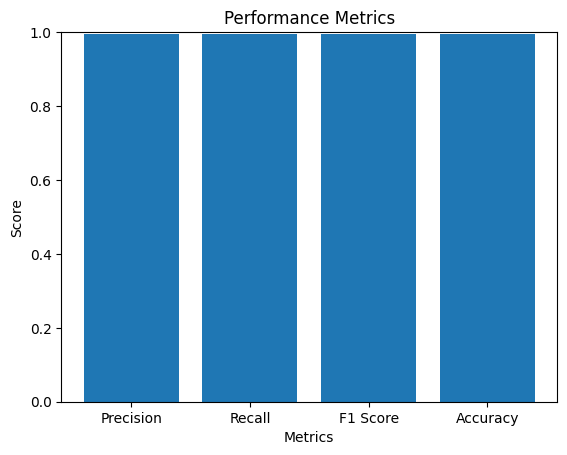

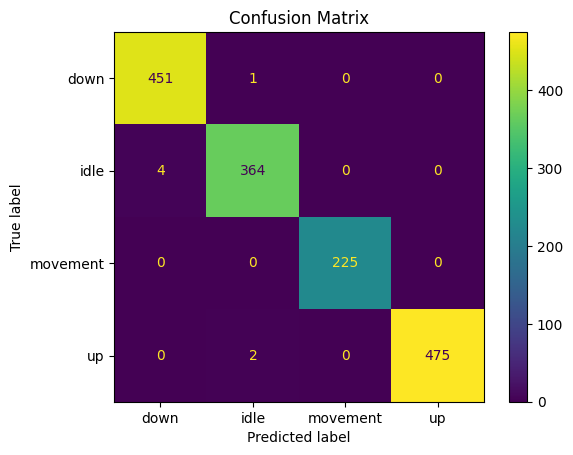

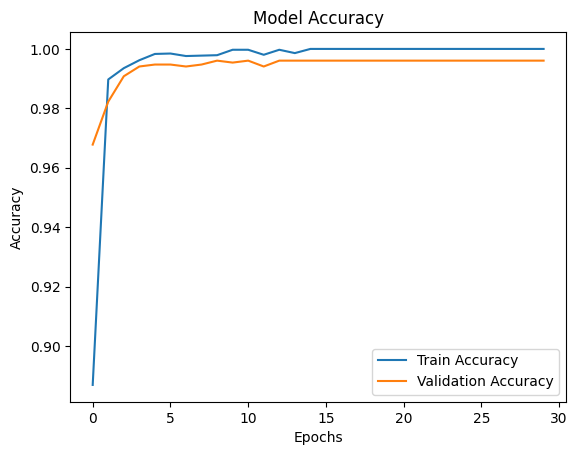

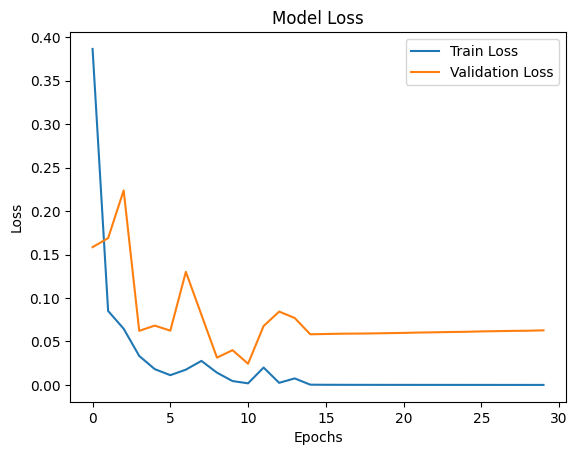

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    precision_score,
    recall_score,
    f1_score,
    accuracy_score
)
import tensorflow as tf
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import (
    Input,
    Conv1D,
    MaxPooling1D,
    Flatten,
    Dense,
    Dropout
)
import matplotlib.pyplot as plt
# Step 4: Load the model and evaluate it
loaded_model = load_model("/content/drive/MyDrive/Paper_1_dataset/filtered_data_no_missing_00_motion_cnn_simplified_model.h5")
y_pred_probs = loaded_model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Performance metrics
precision = precision_score(y_test, y_pred_classes, average='weighted')
recall = recall_score(y_test, y_pred_classes, average='weighted')
f1 = f1_score(y_test, y_pred_classes, average='weighted')
accuracy = accuracy_score(y_test, y_pred_classes)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Print metrics summary table
metrics_summary = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1 Score', 'Accuracy'],
    'Score': [precision, recall, f1, accuracy]
})
print(metrics_summary)

# Step 5: Visualization
# 1. Plot F1 score, recall, precision, and accuracy
plt.figure()
metrics = ['Precision', 'Recall', 'F1 Score', 'Accuracy']
scores = [precision, recall, f1, accuracy]
plt.bar(metrics, scores)
plt.ylim(0, 1)
plt.title('Performance Metrics')
plt.ylabel('Score')
plt.xlabel('Metrics')
plt.show()

# 2. Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap='viridis')
plt.title("Confusion Matrix")
plt.show()

# 3. Plot training history: accuracy
plt.figure()
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# 4. Plot training history: loss
plt.figure()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

### check for overfitting

Model loaded from /content/drive/MyDrive/Paper_1_dataset/filtered_data_no_missing_00_motion_cnn_simplified_model.h5
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

Performance on Training Set:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step

Performance on Validation Set:
Accuracy: 0.9961
Precision: 0.9961
Recall: 0.9961
F1 Score: 0.9961
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

Performance on Test Set:
Accuracy: 0.9954
Precision: 0.9954
Recall: 0.9954
F1 Score: 0.9954

Metrics Summary:
          Dataset  Accuracy  Precision    Recall  F1 Score
0    Training Set  1.000000   1.000000  1.000000  1.000000
1  Validation Set  0.996055   0.996074  0.996055  0.996057
2        Test Set  0.995401   0.995413  0.995401  0.995402


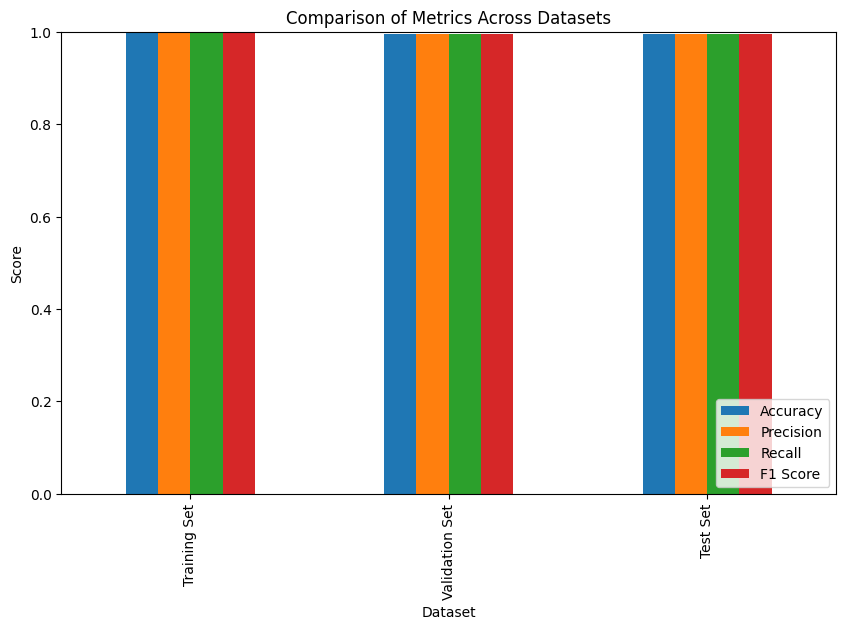

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


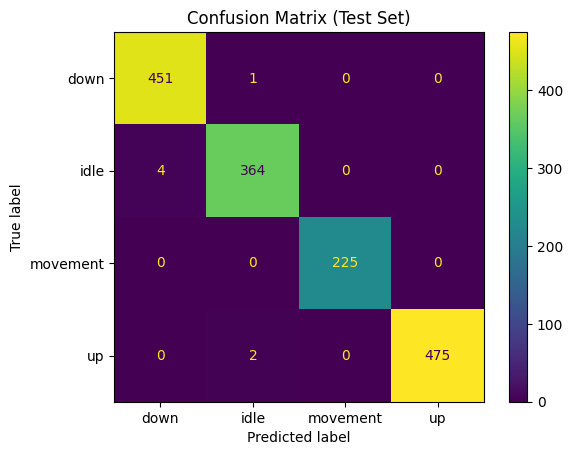

In [6]:
import numpy as np
import pandas as pd
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Step 1: Load the trained model
model_path = "/content/drive/MyDrive/Paper_1_dataset/filtered_data_no_missing_00_motion_cnn_simplified_model.h5"
loaded_model = load_model(model_path)
print(f"Model loaded from {model_path}")

# Step 2: Load and preprocess the data (use the same preprocessing as during training)
data = pd.read_csv(file_path_00)

# Drop columns with missing values
data_clean = data.dropna(axis=1)

# Separate features and labels
X = data_clean.drop(columns=['label'])  # Assuming 'label' column exists
y = data_clean['label']

# Encode labels into integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape data for CNN input (assume each time step is represented by columns)
n_features = X_scaled.shape[1]
X_reshaped = X_scaled.reshape(-1, n_features, 1)

# Split into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_reshaped, y_encoded, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Step 3: Evaluate performance on train, validation, and test sets
def evaluate_model(model, X, y, dataset_name):
    y_pred_probs = model.predict(X)
    y_pred_classes = np.argmax(y_pred_probs, axis=1)

    accuracy = accuracy_score(y, y_pred_classes)
    precision = precision_score(y, y_pred_classes, average='weighted')
    recall = recall_score(y, y_pred_classes, average='weighted')
    f1 = f1_score(y, y_pred_classes, average='weighted')

    print(f"\nPerformance on {dataset_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    return {
        "Dataset": dataset_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    }

# Evaluate on train, validation, and test sets
train_metrics = evaluate_model(loaded_model, X_train, y_train, "Training Set")
val_metrics = evaluate_model(loaded_model, X_val, y_val, "Validation Set")
test_metrics = evaluate_model(loaded_model, X_test, y_test, "Test Set")

# Step 4: Summarize metrics in a table
import pandas as pd
metrics_summary = pd.DataFrame([train_metrics, val_metrics, test_metrics])
print("\nMetrics Summary:")
print(metrics_summary)

# Step 5: Plot metrics for comparison
metrics_summary.plot(
    x="Dataset",
    y=["Accuracy", "Precision", "Recall", "F1 Score"],
    kind="bar",
    figsize=(10, 6),
    title="Comparison of Metrics Across Datasets"
)
plt.ylabel("Score")
plt.ylim(0, 1)
plt.legend(loc="lower right")
plt.show()

# Step 6: Confusion matrix for test set
y_test_pred_probs = loaded_model.predict(X_test)
y_test_pred_classes = np.argmax(y_test_pred_probs, axis=1)
cm = confusion_matrix(y_test, y_test_pred_classes)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap='viridis')
plt.title("Confusion Matrix (Test Set)")
plt.show()


## Dataset 30

### model training

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# Step 1: Load and preprocess the data
data = pd.read_csv(file_path_30)

# Drop columns with missing values
data_clean = data.dropna(axis=1)

# Separate features and labels
X = data_clean.drop(columns=['label'])  # Assuming 'label' column exists
y = data_clean['label']

# Encode labels into integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape data for CNN input
n_features = X_scaled.shape[1]
X_reshaped = X_scaled.reshape(-1, n_features, 1)

# Split into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_reshaped, y_encoded, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Step 2: Build the simplified CNN model
model = Sequential([
    Conv1D(filters=16, kernel_size=3, activation='relu', input_shape=(n_features, 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')
])

# Step 3: Compile and train the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,  # Reduced epochs for faster training
    batch_size=32,  # Reduced batch size for simplicity
    verbose=1
)

# Save the model
model.save("/content/drive/MyDrive/Paper_1_dataset/filtered_data_no_missing_30_motion_cnn_simplified_model.h5")
print("Model saved as '/content/drive/MyDrive/Paper_1_dataset/filtered_data_no_missing_30_motion_cnn_simplified_model.h5'")


Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


317/317 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.8525 - loss: 0.5132 - val_accuracy: 0.9770 - val_loss: 0.2245
Epoch 2/30
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9885 - loss: 0.0807 - val_accuracy: 0.9820 - val_loss: 0.1517
Epoch 3/30
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9940 - loss: 0.0516 - val_accuracy: 0.9931 - val_loss: 0.0376
Epoch 4/30
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9960 - loss: 0.0119 - val_accuracy: 0.9945 - val_loss: 0.0256
Epoch 5/30
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9984 - loss: 0.0067 - val_accuracy: 0.9959 - val_loss: 0.0233
Epoch 6/30
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9988 - loss: 0.0053 - val_accuracy: 0.9945 - val_loss: 0.0259
Epoch 7/30
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9987 - loss: 0.0035 - val_accuracy: 0.9949 - val_loss: 0.0259
Epoch 8/30
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9992 - loss: 0.0024 - val_accuracy: 0.9940 - val

Model saved as '/content/drive/MyDrive/Paper_1_dataset/filtered_data_no_missing_30_motion_cnn_simplified_model.h5'


### model validation

68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
      Metric     Score
0  Precision  0.995860
1     Recall  0.995854
2   F1 Score  0.995856
3   Accuracy  0.995854


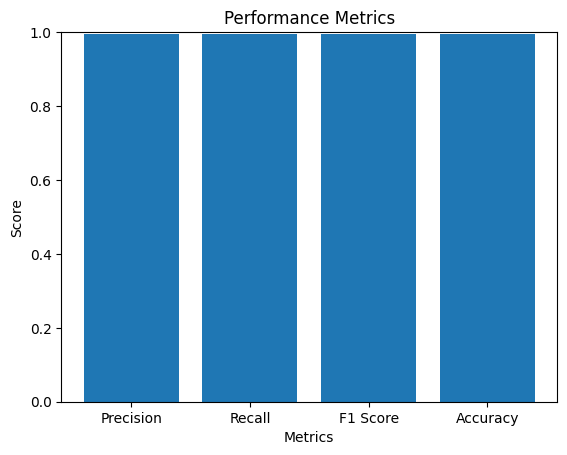

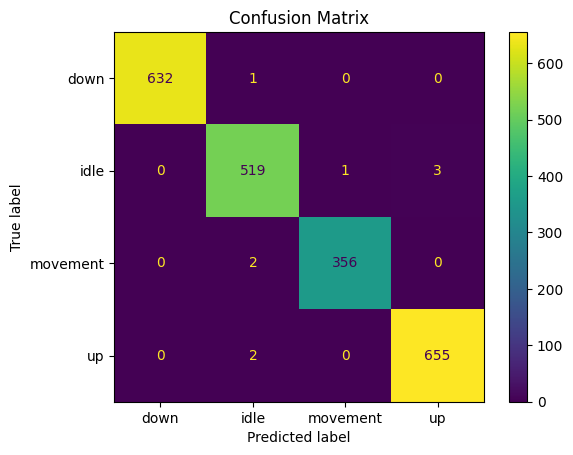

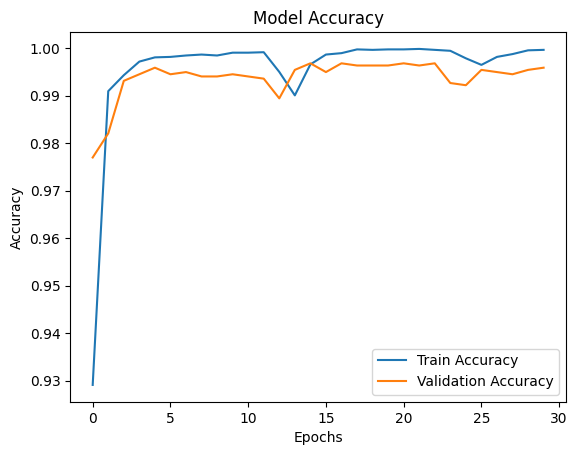

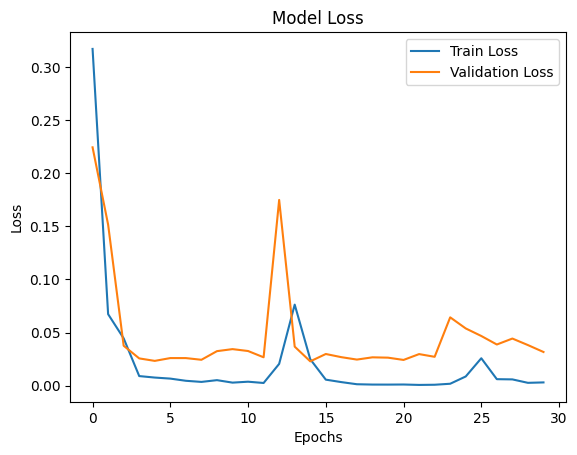

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    precision_score,
    recall_score,
    f1_score,
    accuracy_score
)
import tensorflow as tf
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import (
    Input,
    Conv1D,
    MaxPooling1D,
    Flatten,
    Dense,
    Dropout
)
import matplotlib.pyplot as plt
# Step 4: Load the model and evaluate it
loaded_model = load_model("/content/drive/MyDrive/Paper_1_dataset/filtered_data_no_missing_30_motion_cnn_simplified_model.h5")
y_pred_probs = loaded_model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Performance metrics
precision = precision_score(y_test, y_pred_classes, average='weighted')
recall = recall_score(y_test, y_pred_classes, average='weighted')
f1 = f1_score(y_test, y_pred_classes, average='weighted')
accuracy = accuracy_score(y_test, y_pred_classes)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Print metrics summary table
metrics_summary = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1 Score', 'Accuracy'],
    'Score': [precision, recall, f1, accuracy]
})
print(metrics_summary)

# Step 5: Visualization
# 1. Plot F1 score, recall, precision, and accuracy
plt.figure()
metrics = ['Precision', 'Recall', 'F1 Score', 'Accuracy']
scores = [precision, recall, f1, accuracy]
plt.bar(metrics, scores)
plt.ylim(0, 1)
plt.title('Performance Metrics')
plt.ylabel('Score')
plt.xlabel('Metrics')
plt.show()

# 2. Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap='viridis')
plt.title("Confusion Matrix")
plt.show()

# 3. Plot training history: accuracy
plt.figure()
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# 4. Plot training history: loss
plt.figure()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

### check for overfitting

Model loaded from /content/drive/MyDrive/Paper_1_dataset/filtered_data_no_missing_30_motion_cnn_simplified_model.h5
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Performance on Training Set:
Accuracy: 0.9998
Precision: 0.9998
Recall: 0.9998
F1 Score: 0.9998
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Performance on Validation Set:
Accuracy: 0.9959
Precision: 0.9959
Recall: 0.9959
F1 Score: 0.9959
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Performance on Test Set:
Accuracy: 0.9959
Precision: 0.9959
Recall: 0.9959
F1 Score: 0.9959

Metrics Summary:
          Dataset  Accuracy  Precision    Recall  F1 Score
0    Training Set  0.999803   0.999803  0.999803  0.999803
1  Validation Set  0.995853   0.995879  0.995853  0.995857
2        Test Set  0.995854   0.995860  0.995854  0.995856


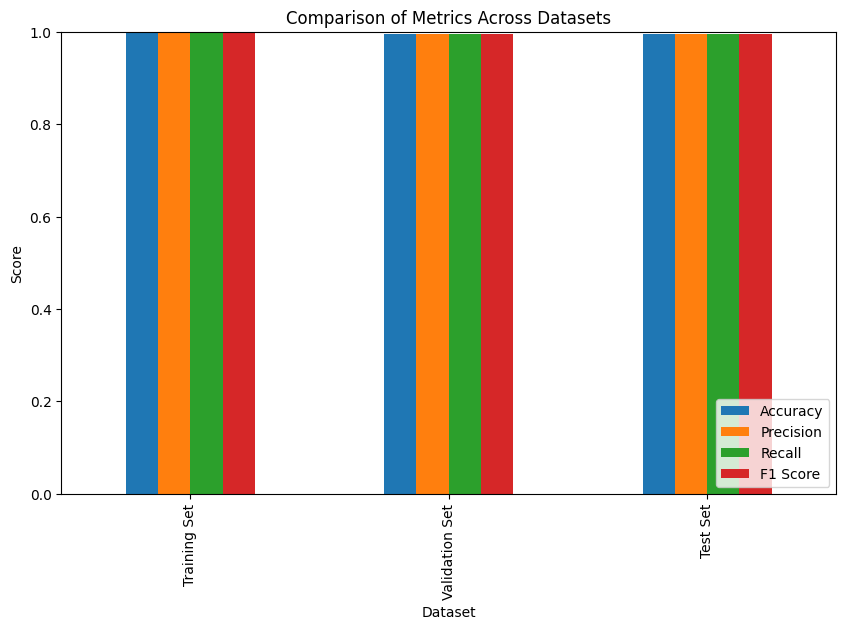

68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


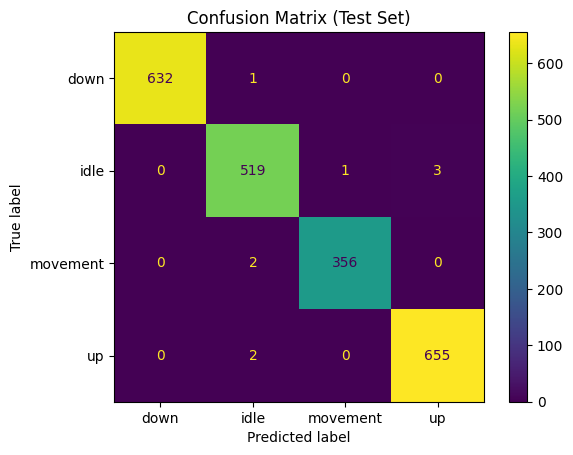

In [9]:
import numpy as np
import pandas as pd
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Step 1: Load the trained model
model_path = "/content/drive/MyDrive/Paper_1_dataset/filtered_data_no_missing_30_motion_cnn_simplified_model.h5"
loaded_model = load_model(model_path)
print(f"Model loaded from {model_path}")

# Step 2: Load and preprocess the data (use the same preprocessing as during training)
data = pd.read_csv(file_path_30)

# Drop columns with missing values
data_clean = data.dropna(axis=1)

# Separate features and labels
X = data_clean.drop(columns=['label'])  # Assuming 'label' column exists
y = data_clean['label']

# Encode labels into integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape data for CNN input (assume each time step is represented by columns)
n_features = X_scaled.shape[1]
X_reshaped = X_scaled.reshape(-1, n_features, 1)

# Split into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_reshaped, y_encoded, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Step 3: Evaluate performance on train, validation, and test sets
def evaluate_model(model, X, y, dataset_name):
    y_pred_probs = model.predict(X)
    y_pred_classes = np.argmax(y_pred_probs, axis=1)

    accuracy = accuracy_score(y, y_pred_classes)
    precision = precision_score(y, y_pred_classes, average='weighted')
    recall = recall_score(y, y_pred_classes, average='weighted')
    f1 = f1_score(y, y_pred_classes, average='weighted')

    print(f"\nPerformance on {dataset_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    return {
        "Dataset": dataset_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    }

# Evaluate on train, validation, and test sets
train_metrics = evaluate_model(loaded_model, X_train, y_train, "Training Set")
val_metrics = evaluate_model(loaded_model, X_val, y_val, "Validation Set")
test_metrics = evaluate_model(loaded_model, X_test, y_test, "Test Set")

# Step 4: Summarize metrics in a table
import pandas as pd
metrics_summary = pd.DataFrame([train_metrics, val_metrics, test_metrics])
print("\nMetrics Summary:")
print(metrics_summary)

# Step 5: Plot metrics for comparison
metrics_summary.plot(
    x="Dataset",
    y=["Accuracy", "Precision", "Recall", "F1 Score"],
    kind="bar",
    figsize=(10, 6),
    title="Comparison of Metrics Across Datasets"
)
plt.ylabel("Score")
plt.ylim(0, 1)
plt.legend(loc="lower right")
plt.show()

# Step 6: Confusion matrix for test set
y_test_pred_probs = loaded_model.predict(X_test)
y_test_pred_classes = np.argmax(y_test_pred_probs, axis=1)
cm = confusion_matrix(y_test, y_test_pred_classes)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap='viridis')
plt.title("Confusion Matrix (Test Set)")
plt.show()


## Dataset 60

### model training

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# Step 1: Load and preprocess the data
data = pd.read_csv(file_path_60)

# Drop columns with missing values
data_clean = data.dropna(axis=1)

# Separate features and labels
X = data_clean.drop(columns=['label'])  # Assuming 'label' column exists
y = data_clean['label']

# Encode labels into integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape data for CNN input
n_features = X_scaled.shape[1]
X_reshaped = X_scaled.reshape(-1, n_features, 1)

# Split into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_reshaped, y_encoded, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Step 2: Build the simplified CNN model
model = Sequential([
    Conv1D(filters=16, kernel_size=3, activation='relu', input_shape=(n_features, 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')
])

# Step 3: Compile and train the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,  # Reduced epochs for faster training
    batch_size=32,  # Reduced batch size for simplicity
    verbose=1
)

# Save the model
model.save("/content/drive/MyDrive/Paper_1_dataset/filtered_data_no_missing_60_motion_cnn_simplified_model.h5")
print("Model saved as '/content/drive/MyDrive/Paper_1_dataset/filtered_data_no_missing_60_motion_cnn_simplified_model.h5'")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
555/555 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8799 - loss: 0.3707 - val_accuracy: 0.9945 - val_loss: 0.1168
Epoch 2/30
555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9945 - loss: 0.0580 - val_accuracy: 0.9966 - val_loss: 0.0617
Epoch 3/30
555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9968 - loss: 0.0350 - val_accuracy: 0.9961 - val_loss: 0.0474
Epoch 4/30
555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9978 - loss: 0.0122 - val_accuracy: 0.9958 - val_loss: 0.0617
Epoch 5/30
555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9956 - loss: 0.0328 - val_accuracy: 0.9953 - val_loss: 0.1109
Epoch 6/30
555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9977 - loss: 0.0128 - val_accuracy: 0.9971 - val_loss: 0.0768
Epoch 7/30
555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9995 - loss: 0.0034 - val_accuracy: 0.9961 - val_loss: 0.0847
Epoch 8/30
555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9995 - loss: 0.0032 - val_accuracy: 0.

Model saved as '/content/drive/MyDrive/Paper_1_dataset/filtered_data_no_missing_60_motion_cnn_simplified_model.h5'


### model validation

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
      Metric     Score
0  Precision  0.998161
1     Recall  0.998160
2   F1 Score  0.998160
3   Accuracy  0.998160


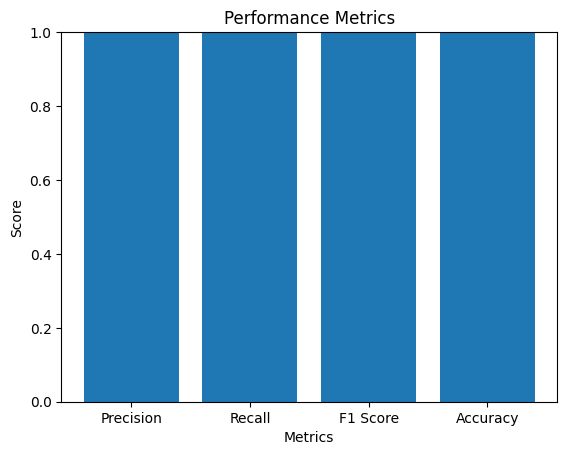

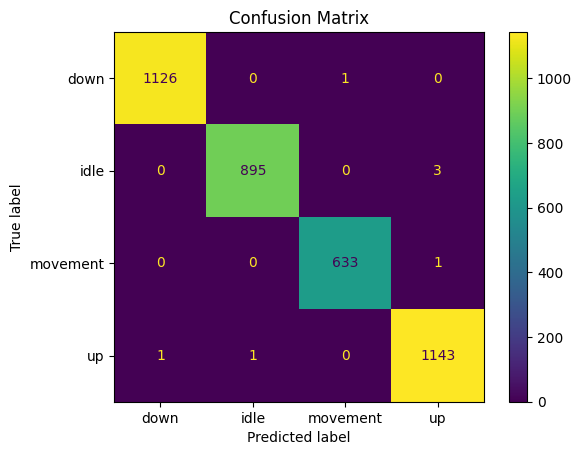

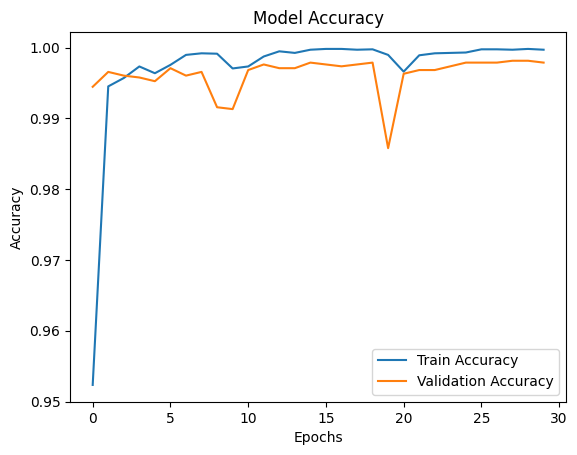

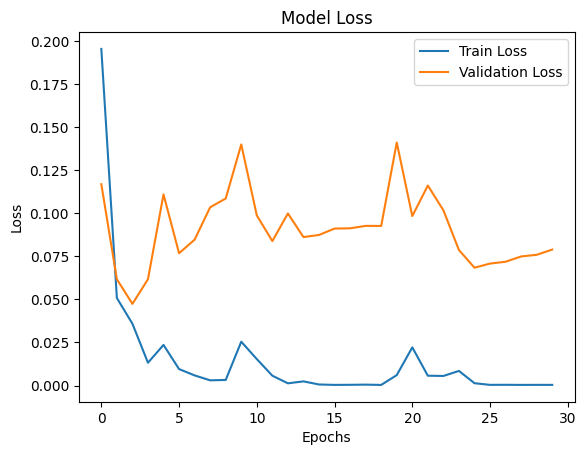

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    precision_score,
    recall_score,
    f1_score,
    accuracy_score
)
import tensorflow as tf
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import (
    Input,
    Conv1D,
    MaxPooling1D,
    Flatten,
    Dense,
    Dropout
)
import matplotlib.pyplot as plt
# Step 4: Load the model and evaluate it
loaded_model = load_model("/content/drive/MyDrive/Paper_1_dataset/filtered_data_no_missing_60_motion_cnn_simplified_model.h5")
y_pred_probs = loaded_model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Performance metrics
precision = precision_score(y_test, y_pred_classes, average='weighted')
recall = recall_score(y_test, y_pred_classes, average='weighted')
f1 = f1_score(y_test, y_pred_classes, average='weighted')
accuracy = accuracy_score(y_test, y_pred_classes)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Print metrics summary table
metrics_summary = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1 Score', 'Accuracy'],
    'Score': [precision, recall, f1, accuracy]
})
print(metrics_summary)

# Step 5: Visualization
# 1. Plot F1 score, recall, precision, and accuracy
plt.figure()
metrics = ['Precision', 'Recall', 'F1 Score', 'Accuracy']
scores = [precision, recall, f1, accuracy]
plt.bar(metrics, scores)
plt.ylim(0, 1)
plt.title('Performance Metrics')
plt.ylabel('Score')
plt.xlabel('Metrics')
plt.show()

# 2. Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap='viridis')
plt.title("Confusion Matrix")
plt.show()

# 3. Plot training history: accuracy
plt.figure()
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# 4. Plot training history: loss
plt.figure()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

### check for overfitting

Model loaded from /content/drive/MyDrive/Paper_1_dataset/filtered_data_no_missing_60_motion_cnn_simplified_model.h5
555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Performance on Training Set:
Accuracy: 0.9999
Precision: 0.9999
Recall: 0.9999
F1 Score: 0.9999
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Performance on Validation Set:
Accuracy: 0.9979
Precision: 0.9979
Recall: 0.9979
F1 Score: 0.9979
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Performance on Test Set:
Accuracy: 0.9982
Precision: 0.9982
Recall: 0.9982
F1 Score: 0.9982

Metrics Summary:
          Dataset  Accuracy  Precision    Recall  F1 Score
0    Training Set  0.999887   0.999887  0.999887  0.999887
1  Validation Set  0.997897   0.997899  0.997897  0.997897
2        Test Set  0.998160   0.998161  0.998160  0.998160


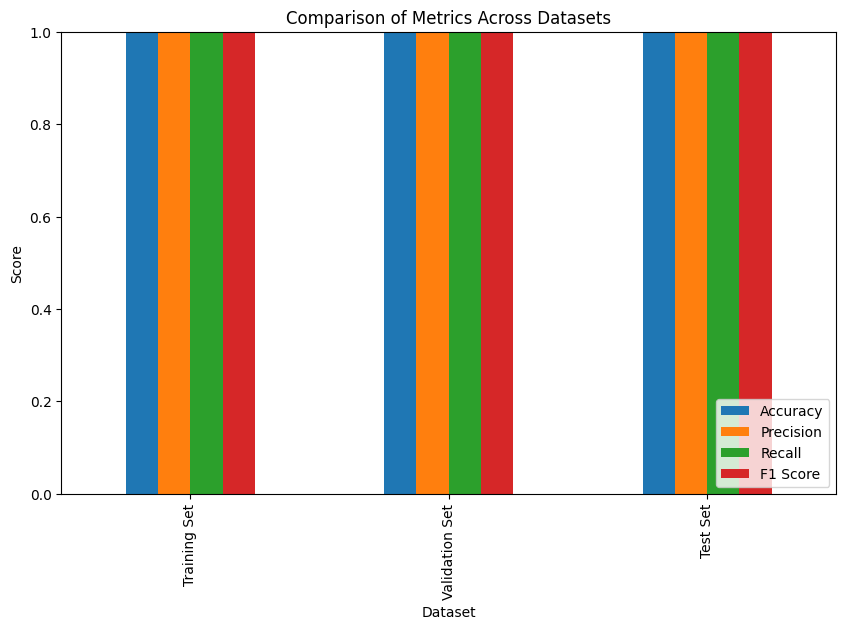

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


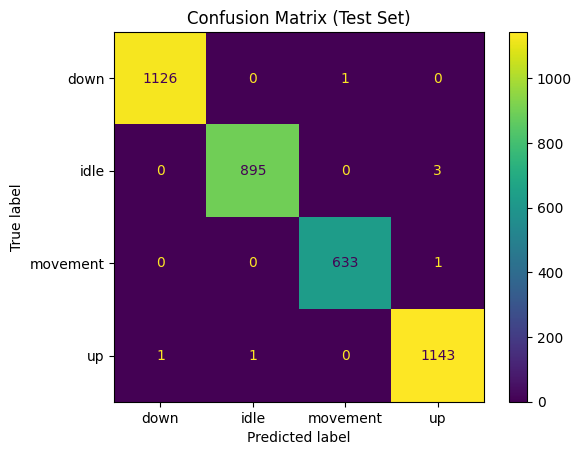

In [12]:
import numpy as np
import pandas as pd
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Step 1: Load the trained model
model_path = "/content/drive/MyDrive/Paper_1_dataset/filtered_data_no_missing_60_motion_cnn_simplified_model.h5"
loaded_model = load_model(model_path)
print(f"Model loaded from {model_path}")

# Step 2: Load and preprocess the data (use the same preprocessing as during training)
data = pd.read_csv(file_path_60)

# Drop columns with missing values
data_clean = data.dropna(axis=1)

# Separate features and labels
X = data_clean.drop(columns=['label'])  # Assuming 'label' column exists
y = data_clean['label']

# Encode labels into integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape data for CNN input (assume each time step is represented by columns)
n_features = X_scaled.shape[1]
X_reshaped = X_scaled.reshape(-1, n_features, 1)

# Split into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_reshaped, y_encoded, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Step 3: Evaluate performance on train, validation, and test sets
def evaluate_model(model, X, y, dataset_name):
    y_pred_probs = model.predict(X)
    y_pred_classes = np.argmax(y_pred_probs, axis=1)

    accuracy = accuracy_score(y, y_pred_classes)
    precision = precision_score(y, y_pred_classes, average='weighted')
    recall = recall_score(y, y_pred_classes, average='weighted')
    f1 = f1_score(y, y_pred_classes, average='weighted')

    print(f"\nPerformance on {dataset_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    return {
        "Dataset": dataset_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    }

# Evaluate on train, validation, and test sets
train_metrics = evaluate_model(loaded_model, X_train, y_train, "Training Set")
val_metrics = evaluate_model(loaded_model, X_val, y_val, "Validation Set")
test_metrics = evaluate_model(loaded_model, X_test, y_test, "Test Set")

# Step 4: Summarize metrics in a table
import pandas as pd
metrics_summary = pd.DataFrame([train_metrics, val_metrics, test_metrics])
print("\nMetrics Summary:")
print(metrics_summary)

# Step 5: Plot metrics for comparison
metrics_summary.plot(
    x="Dataset",
    y=["Accuracy", "Precision", "Recall", "F1 Score"],
    kind="bar",
    figsize=(10, 6),
    title="Comparison of Metrics Across Datasets"
)
plt.ylabel("Score")
plt.ylim(0, 1)
plt.legend(loc="lower right")
plt.show()

# Step 6: Confusion matrix for test set
y_test_pred_probs = loaded_model.predict(X_test)
y_test_pred_classes = np.argmax(y_test_pred_probs, axis=1)
cm = confusion_matrix(y_test, y_test_pred_classes)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap='viridis')
plt.title("Confusion Matrix (Test Set)")
plt.show()
